# Model Training

In [1]:
# featureset_test / featureset_train -> df_test, df_train

import pandas as pd


df_train = pd.read_csv('features/featureset_train.txt', header=None, names=[f'X{i}' for i in range(1,363)]+['Y']).sample(frac=1).reset_index(drop=True)
df_test = pd.read_csv('features/featureset_test.txt', header=None, names=[f'X{i}' for i in range(1,363)]+['Y']).sample(frac=1).reset_index(drop=True)

print(df_test)
print(df_train)

           X1        X2        X3        X4        X5        X6        X7  \
0    0.336115  0.020103 -0.266554  0.432240  0.116025 -0.169818  0.593764   
1    0.369973  0.638344 -0.115731  0.378774  0.521400 -0.116213  0.389359   
2    0.534899  0.105115 -0.476895  0.545610  0.185091 -0.132872  0.685583   
3    0.434036  0.201233 -0.196773  0.460081  0.268716 -0.091451  0.534143   
4    0.060222  0.459067 -0.323712  0.134183  0.504433 -0.195050  0.178684   
..        ...       ...       ...       ...       ...       ...       ...   
337  0.511387  0.173265 -1.017160  0.513228  0.230162 -0.667818  0.641868   
338  0.763684  0.838369  0.056877  0.702330  0.871938  0.043543  0.662731   
339  0.400139  0.711810 -0.055930  0.398110  0.640282 -0.053118  0.396714   
340  0.497485  0.165941 -0.207108  0.498105  0.232765 -0.064559  0.551759   
341  0.467450  0.293213 -0.305512  0.470377  0.333441 -0.164527  0.534929   

           X8        X9       X10  ...      X354      X355      X356  \
0  

In [2]:
# X_train, y_train , X_test, y_test

X_train = df_train[[f'X{i}' for i in range(1,363)]]
y_train = df_train[['Y']]

X_test = df_test[[f'X{i}' for i in range(1,363)]]
y_test = df_test[['Y']]

print(X_test, y_test)


           X1        X2        X3        X4        X5        X6        X7  \
0    0.336115  0.020103 -0.266554  0.432240  0.116025 -0.169818  0.593764   
1    0.369973  0.638344 -0.115731  0.378774  0.521400 -0.116213  0.389359   
2    0.534899  0.105115 -0.476895  0.545610  0.185091 -0.132872  0.685583   
3    0.434036  0.201233 -0.196773  0.460081  0.268716 -0.091451  0.534143   
4    0.060222  0.459067 -0.323712  0.134183  0.504433 -0.195050  0.178684   
..        ...       ...       ...       ...       ...       ...       ...   
337  0.511387  0.173265 -1.017160  0.513228  0.230162 -0.667818  0.641868   
338  0.763684  0.838369  0.056877  0.702330  0.871938  0.043543  0.662731   
339  0.400139  0.711810 -0.055930  0.398110  0.640282 -0.053118  0.396714   
340  0.497485  0.165941 -0.207108  0.498105  0.232765 -0.064559  0.551759   
341  0.467450  0.293213 -0.305512  0.470377  0.333441 -0.164527  0.534929   

           X8        X9       X10  ...      X353      X354      X355  \
0  

In [3]:
# decision tree

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()

accuracies = cross_val_score(clf,X_train,y_train, cv=5)

clf.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
dtr=np.mean(accuracies)
print("Test Score:",clf.score(X_test,y_test))
dte=clf.score(X_test,y_test)


y_test_prediction = clf.predict(X_test)
d_conf_matrix = confusion_matrix(y_test, y_test_prediction)

Train Score: 0.8961386308909528
Test Score: 0.9210526315789473


In [4]:
# SVM

import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

svc = svm.SVC(random_state=101, C =3)

accuracies = cross_val_score(svc,X_train,y_train,cv=5)

svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
st = np.mean(accuracies)
print("Test Score:",svc.score(X_test,y_test))
ste=svc.score(X_test,y_test)


y_test_prediction = svc.predict(X_test)
s_conf_matrix = confusion_matrix(y_test, y_test_prediction)

/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

Train Score: 0.9500687994496044
Test Score: 0.9766081871345029


In [5]:
# KNN

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2, weights="distance")

accuracies = cross_val_score(knn,X_train,y_train,cv=5)

knn.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
ktr = np.mean(accuracies)
print("Test Score:",knn.score(X_test,y_test))
kte = knn.score(X_test,y_test)

y_test_prediction = knn.predict(X_test)
k_conf_matrix = confusion_matrix(y_test, y_test_prediction)

/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

Train Score: 0.9329893360853113
Test Score: 0.9853801169590644


# Model Save

In [6]:
import joblib

joblib.dump(clf, 'models/decisiontree.joblib')

joblib.dump(svc, 'models/svm.joblib')

joblib.dump(knn, 'models/knn2.joblib')

['models/knn2.joblib']

# Visualization

# Model Load

In [7]:
clf = joblib.load('models/decisiontree.joblib')

svm = joblib.load('models/svm.joblib')

knn = joblib.load('models/knn.joblib')


# Visualization

In [8]:
from prettytable import PrettyTable as pt
myTable = pt(["Model Name", "Training Accuracy", "Testing Accuracy"])
# Add rows
myTable.add_row(["KNN",str(round(ktr*100,2))+"%",str(round(kte*100,2))+"%"])
myTable.add_row(["Decision Tree", str(round(dtr*100,2))+"%", str(round(dte*100,2))+"%"])
myTable.add_row(["SVM",str(round(st*100,2))+"%", str(round(ste*100,2))+"%"])
print(myTable)

+---------------+-------------------+------------------+
|   Model Name  | Training Accuracy | Testing Accuracy |
+---------------+-------------------+------------------+
|      KNN      |       93.3%       |      98.54%      |
| Decision Tree |       89.61%      |      92.11%      |
|      SVM      |       95.01%      |      97.66%      |
+---------------+-------------------+------------------+


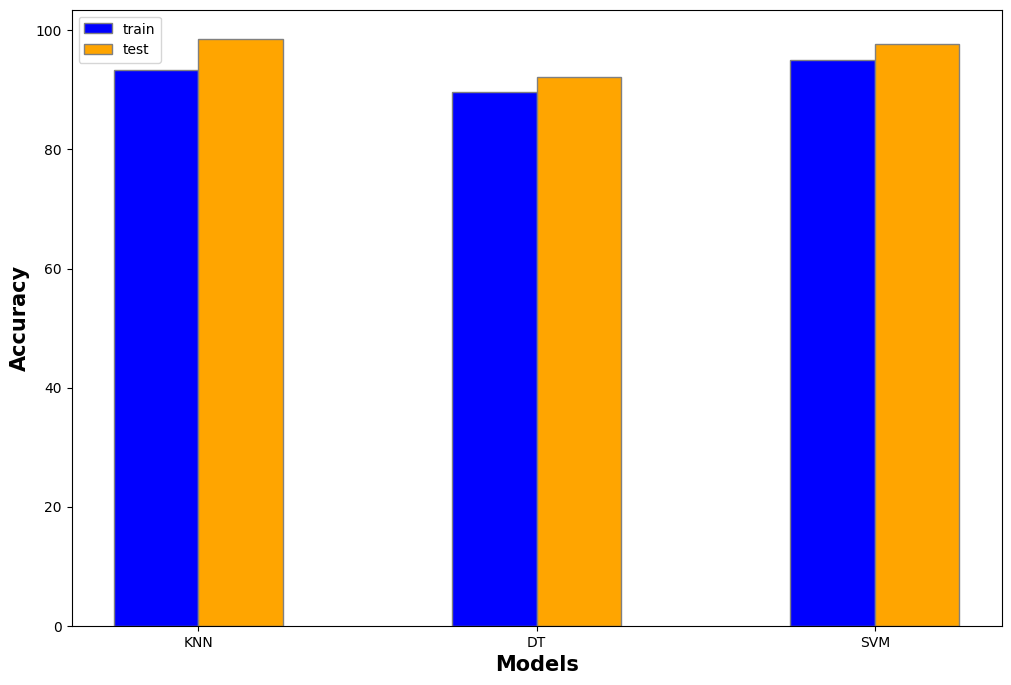

In [9]:
import matplotlib.pyplot as plt

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
train=[round(ktr*100,2),round(dtr*100,2),round(st*100,2)]
test=[round(kte*100,2),round(dte*100,2),round(ste*100,2)]


# Set position of bar on X axis
br1 = np.arange(len(train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train, color ='b', width = barWidth,
        edgecolor ='grey', label ='train')
plt.bar(br2, test, color ='orange', width = barWidth,
        edgecolor ='grey', label ='test')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(train))],['KNN', 'DT','SVM'])

plt.legend()
plt.show()


In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
d = [
    'downdog',
    'Bitilasana',
    'tree',
    'Salamba_Sarvangasana',
    'Vasisthasana',
    'warrior'
]

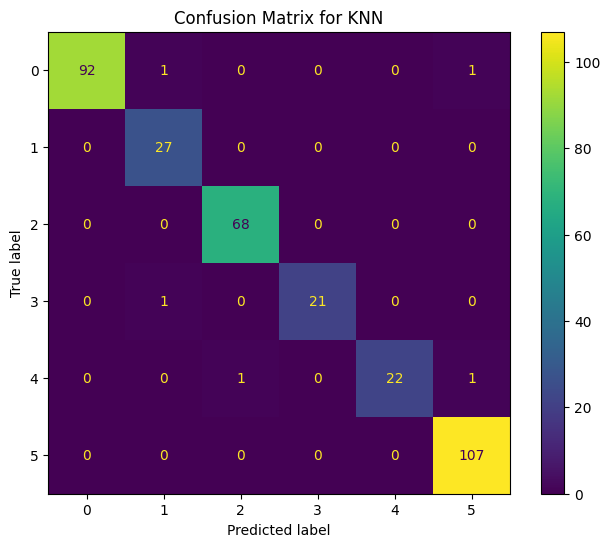

In [11]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)


display = ConfusionMatrixDisplay(k_conf_matrix)

ax.set(title='Confusion Matrix for KNN')
display.plot(ax=ax)


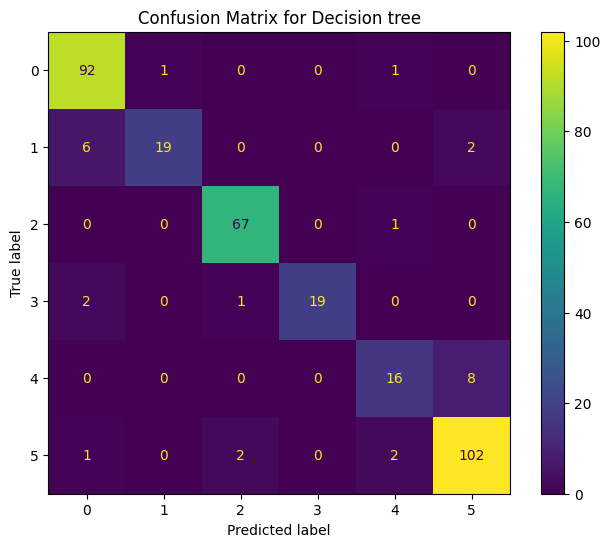

In [12]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(d_conf_matrix)

ax.set(title='Confusion Matrix for Decision tree')

display.plot(ax=ax)


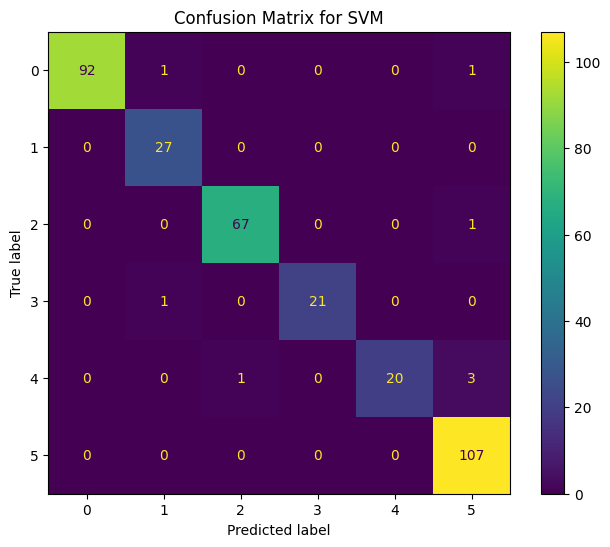

In [13]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(s_conf_matrix)

ax.set(title='Confusion Matrix for SVM')

display.plot(ax=ax)


